In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

1.(4) Реализуйте алгоритм логистической регрессии со стохастическим градиентным спуском. Градиентный спуск нужно делать пока уменьшается ошибка на test датасете. Выведите график зависимости точности от итерации на датасетах cancer.csv и spam.csv.

In [540]:
def load_reg_data(name):
    data = pd.read_csv("../data/" + name + ".csv")
    if name == "cancer":
        mapping = {'M': 1, 'B': -1}
    else:
        mapping = {0: -1}
    
    X, y = data.drop("label", axis=1).values, data.replace({'label': mapping})["label"].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_ = np.c_[np.ones(X.shape[0]), X]

    return train_test_split(X_, y)

In [584]:
def regress(train_X, test_X, train_y, test_y, batch_size=15, learning_rate=0.5):
    accuracy_prev = -np.inf
    w = np.random.rand(train_X.shape[1])
    iters = 0 
    accuracies = []
    
    while True:
        batch_idx = np.random.choice(train_X.shape[1], batch_size, replace=False)
        ybatch = train_y[batch_idx]
        Xbatch = train_X[batch_idx, :]

        a = -np.mean((Xbatch.T * ybatch) / (1 + np.exp(((Xbatch * w).T * ybatch))), axis=1)
        w -= learning_rate * a

        h = np.sign(np.sum(np.tile(w, (test_X.shape[0], 1)) * test_X, axis=1))
        accuracy_cur = accuracy_score(test_y, h)
        
        if accuracy_cur >= accuracy_prev:
            accuracy_prev = accuracy_cur
            accuracies.append(accuracy_prev)
            iters += 1
        else:
            print("Accuracy on test: " + str(accuracy_prev) + " with " + str(iters) + " iterations")
            plt.plot(accuracies, '-')
            plt.xlabel('iteration')
            plt.ylabel('accuracy')
            return w

Accuracy on test: 0.9230769230769231 with 44 iterations


array([-0.64043488,  1.98879011,  1.20727574,  2.05582955,  2.10409714,
        1.2834084 ,  1.51353058,  1.82698364,  2.56251747,  1.14031063,
        0.44580539,  1.9929295 ,  0.66914959,  1.74543017,  2.52839742,
        0.58430532,  0.96546302,  1.03217108,  1.51480113, -0.24461163,
        0.94264383,  2.53886487,  1.55379509,  2.58948393,  2.65922478,
        1.6658703 ,  2.26931503,  2.15655469,  2.53248746,  1.63243929,
        1.7693797 ])

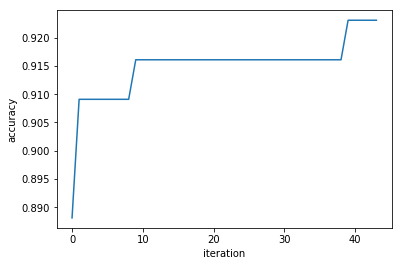

In [585]:
regress(*load_reg_data("cancer"))

Accuracy on test: 0.8514335360556038 with 24 iterations


array([-0.42123691,  0.27316023, -0.04555728,  0.44359491,  0.99864199,
        0.71649835,  0.94717007,  0.89628347,  1.17156664,  0.82904097,
        0.52542729,  0.98784382,  0.05019721,  0.59794001, -0.15356162,
        0.81310347,  0.7006564 ,  0.43308384,  0.25414012,  0.53038813,
        0.26132965,  0.91741859,  1.07649881,  0.61644314,  0.70284307,
       -0.21793673,  0.00561646, -0.22809117, -0.15353229,  0.00440647,
       -0.27205301,  0.52263578,  0.43148206, -0.21755572,  0.52817273,
        0.36731337,  0.9475494 , -0.37064186,  0.51376195,  0.2762022 ,
        0.89738943, -0.13526977,  0.25197156,  0.53529291, -0.19730183,
       -0.1384757 , -0.21363635,  0.4428432 , -0.24285069,  0.28961756,
       -0.0411372 , -0.0120317 ,  0.85158272,  0.92068982,  0.83000978,
        0.71519126,  1.09726432,  1.03012343])

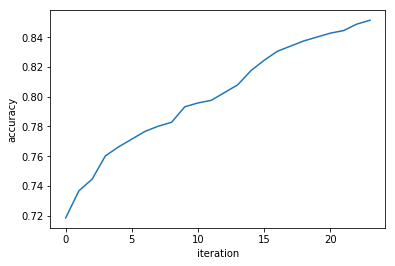

In [586]:
regress(*load_reg_data("spam"), batch_size=20, learning_rate=0.2)

2.(2) Преобразуйте датасеты mnist и notMNIST так, чтобы каждая точка представляла собой квадратную матрицу.